In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
derek = pd.read_csv(interim_dir+'Derek_processed_150423.csv', index_col = [0])

In [4]:
final_table = derek.copy()

In [5]:
#final_table

In [6]:
final_table['alert'] = final_table[['endpoint', 'toxicophore']].apply(tuple, axis =1)
final_table['alert'] =[str(e) for e in final_table['alert'] ]



In [7]:
final_table.drop(['endpoint', 'toxicophore', 'confidence'], axis = 1, inplace = True)

In [8]:
final_table.index = final_table['alert']

In [9]:
#final_table.groupby('alert').filter(lambda x: len(x) >1).sort_values(by = 'alert')

In [10]:
final_table = final_table.drop(['alert'], axis = 1)

In [11]:
final_table = final_table.groupby(final_table.index).agg('max')

In [12]:
final_table.max().max()

1

In [13]:
final_table = final_table.transpose()

In [14]:
derek.endpoint.nunique()

53

In [366]:
final_table.head()

alert,"('5alpha-Reductase inhibition mammal', ""4-Carboxy-4'-benzoyl-benzophenone or analogue"")","('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')","('Adrenal gland toxicity mammal', 'Adamantane')","('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')","('Adrenal gland toxicity mammal', 'Methylenebisphenol')","('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')","('Androgen receptor modulation mammal', ""[1,1'-Biphenyl]-4-carbonitrile or derivative"")","('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')","('Androgen receptor modulation mammal', 'Chalcone derivative')","('Androgen receptor modulation mammal', 'Quinoline or analogue')",...,"('Urolithiasis mammal', 'Aromatic sulphonamide or methazolamide analogue')","('Urolithiasis mammal', 'Bisoprolol-like')","('Urolithiasis mammal', 'Cidofovir-like')","('Urolithiasis mammal', 'Etidronic acid-like')","('Urolithiasis mammal', 'Methyclothiazide-like')","('Urolithiasis mammal', 'Sulfadiazine-like')","('Urolithiasis mammal', 'Ticrynafen-like')","('alpha-2-mu-Globulin nephropathy mammal', 'Isopentyl group')","('alpha-2-mu-Globulin nephropathy mammal', 'Polychlorinated ethane')","('alpha-2-mu-Globulin nephropathy mammal', 'Polyhalogenated benzene')"
DTXSID3060164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID7060837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9025879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2026282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4052188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])

In [235]:
df.shape

(14247, 133)

In [236]:
df['group_str'].nunique()

180

In [187]:
#df['group_str'] = [str(e) for e in df['group']]

In [237]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [238]:
derek1 = (final_table.reset_index()
 .assign(group_str = final_table.reset_index()['index'].replace(mydict ))
 )

In [239]:
derek1 = (derek1.assign(final_picks = derek1['index'].replace(selections)))

In [240]:
derek2= derek1.set_index('index')

In [241]:
derek2.to_csv(interim_dir+'derek2_041223.csv')

In [376]:
alerts_lst = []
for col in derek2.columns.tolist()[:-2]:
    alerts_lst.append([col, derek2[col].sum()])

In [389]:
828+613+543

1984

In [391]:
517+515+500+479+479+479+432+432

3833

In [390]:
pd.DataFrame(alerts_lst, columns = ['alert', 'number of substances with alert']).sort_values(by = 'number of substances with alert', ascending = False).head(20)

,alert,number of substances with alert
528,"('Skin irritation/corrosion mammal', 'Alkyl am...",828
550,"('Skin irritation/corrosion mammal', 'alpha,be...",613
529,"('Skin irritation/corrosion mammal', 'Alkyl ha...",543
221,"('Hepatotoxicity mammal', 'Aromatic nitro comp...",517
39,"('Carcinogenicity mammal', 'Alkylating agent')",515
46,"('Carcinogenicity mammal', 'Aromatic nitro com...",500
108,"('Chromosome damage in vitro mammal', 'Alkylat...",479
348,"('Mutagenicity in vitro bacterium', 'Alkylatin...",479
172,"('Chromosome damage in vivo mammal', 'Aromatic...",432
115,"('Chromosome damage in vitro mammal', 'Aromati...",432


In [402]:
pd.DataFrame(alerts_lst, columns = ['alert', 'number of substances with alert']).sort_values(by = 'number of substances with alert', ascending = False).describe()

,number of substances with alert
count,619.000000
mean,49.835218
std,100.317531
min,1.000000
25%,3.000000
50%,11.000000
75%,39.000000
max,828.000000


In [412]:
cm = derek2.iloc[:,:-2].corr()

In [413]:
threshold = 0.8

# Find pairs of highly correlated features
high_corr_features = set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j]) > threshold:
            colname = cm.columns[i]
            high_corr_features.add(colname)

# Remove highly correlated features
derek3 = derek2.iloc[:, :-2].drop(columns=high_corr_features)


In [418]:
len(high_corr_features)

215

<Axes: xlabel='alert', ylabel='index'>

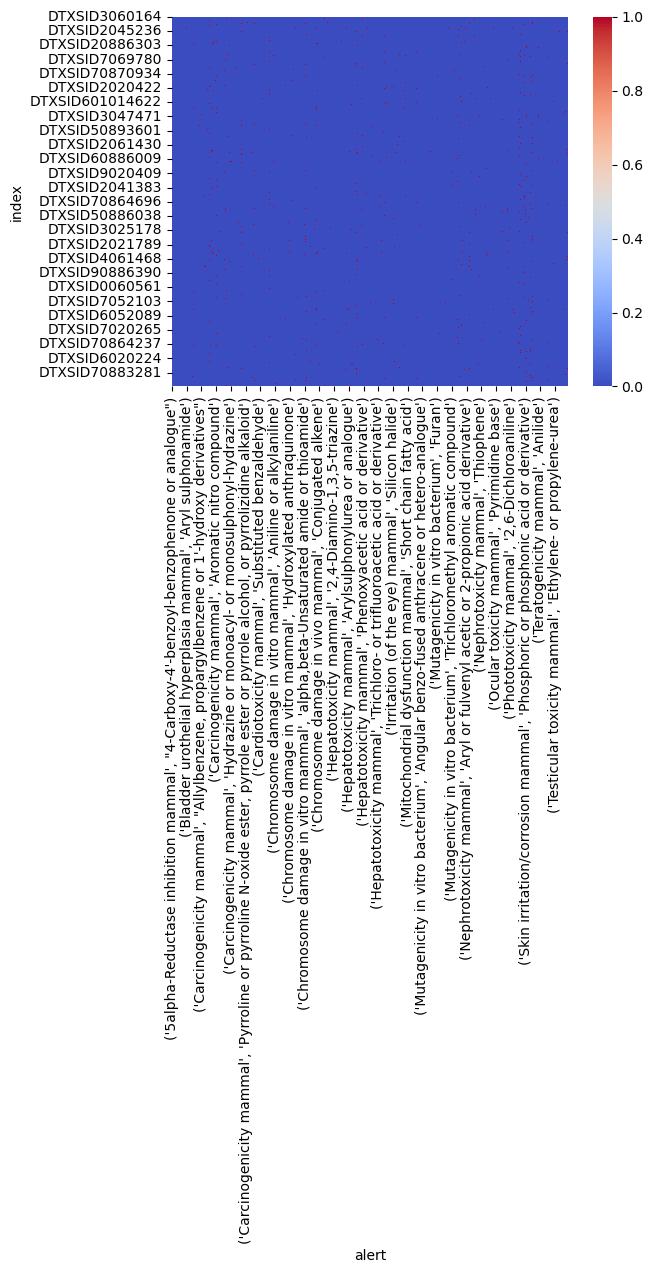

In [416]:
sns.heatmap(derek3, cmap = 'coolwarm')

In [242]:
from sklearn.manifold import TSNE

In [405]:
derek3 = derek2.copy()
derek3.index = derek3.loc[:,'group_str']
derek3

alert,"('5alpha-Reductase inhibition mammal', ""4-Carboxy-4'-benzoyl-benzophenone or analogue"")","('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')","('Adrenal gland toxicity mammal', 'Adamantane')","('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')","('Adrenal gland toxicity mammal', 'Methylenebisphenol')","('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')","('Androgen receptor modulation mammal', ""[1,1'-Biphenyl]-4-carbonitrile or derivative"")","('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')","('Androgen receptor modulation mammal', 'Chalcone derivative')","('Androgen receptor modulation mammal', 'Quinoline or analogue')",...,"('Urolithiasis mammal', 'Cidofovir-like')","('Urolithiasis mammal', 'Etidronic acid-like')","('Urolithiasis mammal', 'Methyclothiazide-like')","('Urolithiasis mammal', 'Sulfadiazine-like')","('Urolithiasis mammal', 'Ticrynafen-like')","('alpha-2-mu-Globulin nephropathy mammal', 'Isopentyl group')","('alpha-2-mu-Globulin nephropathy mammal', 'Polychlorinated ethane')","('alpha-2-mu-Globulin nephropathy mammal', 'Polyhalogenated benzene')",group_str,final_picks
group_str,,,,,,,,,,,,,,,,,,,,,
"('Triphenyl compounds', nan)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Triphenyl compounds', nan)",NaN
"('Organohalogen compounds', 1.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organohalogen compounds', 1.0)",NaN
"('Phenylpropanoids and polyketides', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Phenylpropanoids and polyketides', 2.0)",NaN
"('Anthracenes', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Anthracenes', 2.0)",NaN
"('Organooxygen compounds', 3.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organooxygen compounds', 3.0)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('Benzothiazoles', nan)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Benzothiazoles', nan)",NaN
"('Fatty Acyls', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Fatty Acyls', 2.0)",NaN
"('Organic carbonic acids and derivatives', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Organic carbonic acids and derivatives', 2.0)",NaN


In [408]:
derek3.iloc[:,:-2]

alert,"('5alpha-Reductase inhibition mammal', ""4-Carboxy-4'-benzoyl-benzophenone or analogue"")","('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')","('Adrenal gland toxicity mammal', 'Adamantane')","('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')","('Adrenal gland toxicity mammal', 'Methylenebisphenol')","('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')","('Androgen receptor modulation mammal', ""[1,1'-Biphenyl]-4-carbonitrile or derivative"")","('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')","('Androgen receptor modulation mammal', 'Chalcone derivative')","('Androgen receptor modulation mammal', 'Quinoline or analogue')",...,"('Urolithiasis mammal', 'Aromatic sulphonamide or methazolamide analogue')","('Urolithiasis mammal', 'Bisoprolol-like')","('Urolithiasis mammal', 'Cidofovir-like')","('Urolithiasis mammal', 'Etidronic acid-like')","('Urolithiasis mammal', 'Methyclothiazide-like')","('Urolithiasis mammal', 'Sulfadiazine-like')","('Urolithiasis mammal', 'Ticrynafen-like')","('alpha-2-mu-Globulin nephropathy mammal', 'Isopentyl group')","('alpha-2-mu-Globulin nephropathy mammal', 'Polychlorinated ethane')","('alpha-2-mu-Globulin nephropathy mammal', 'Polyhalogenated benzene')"
group_str,,,,,,,,,,,,,,,,,,,,,
"('Triphenyl compounds', nan)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Organohalogen compounds', 1.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Phenylpropanoids and polyketides', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Anthracenes', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Organooxygen compounds', 3.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('Benzothiazoles', nan)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Fatty Acyls', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('Organic carbonic acids and derivatives', 2.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
results = {}
for i, group in derek2.groupby('group_str'):
    results[i] = group

In [244]:
import sys

In [245]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [246]:
from model_functions import *

In [247]:
dists = {}
for k, v in results.items():
    dists[k] = distance_matrix(v.iloc[:,:-2])

In [248]:
import pickle
pickle.dump( dists, open(interim_dir+ "dists_derek_041223.pkl", "wb" ) )

In [249]:
dists["('Pyridines and derivatives', 1.0)"].shape

(27, 27)

<Axes: xlabel='index', ylabel='index'>

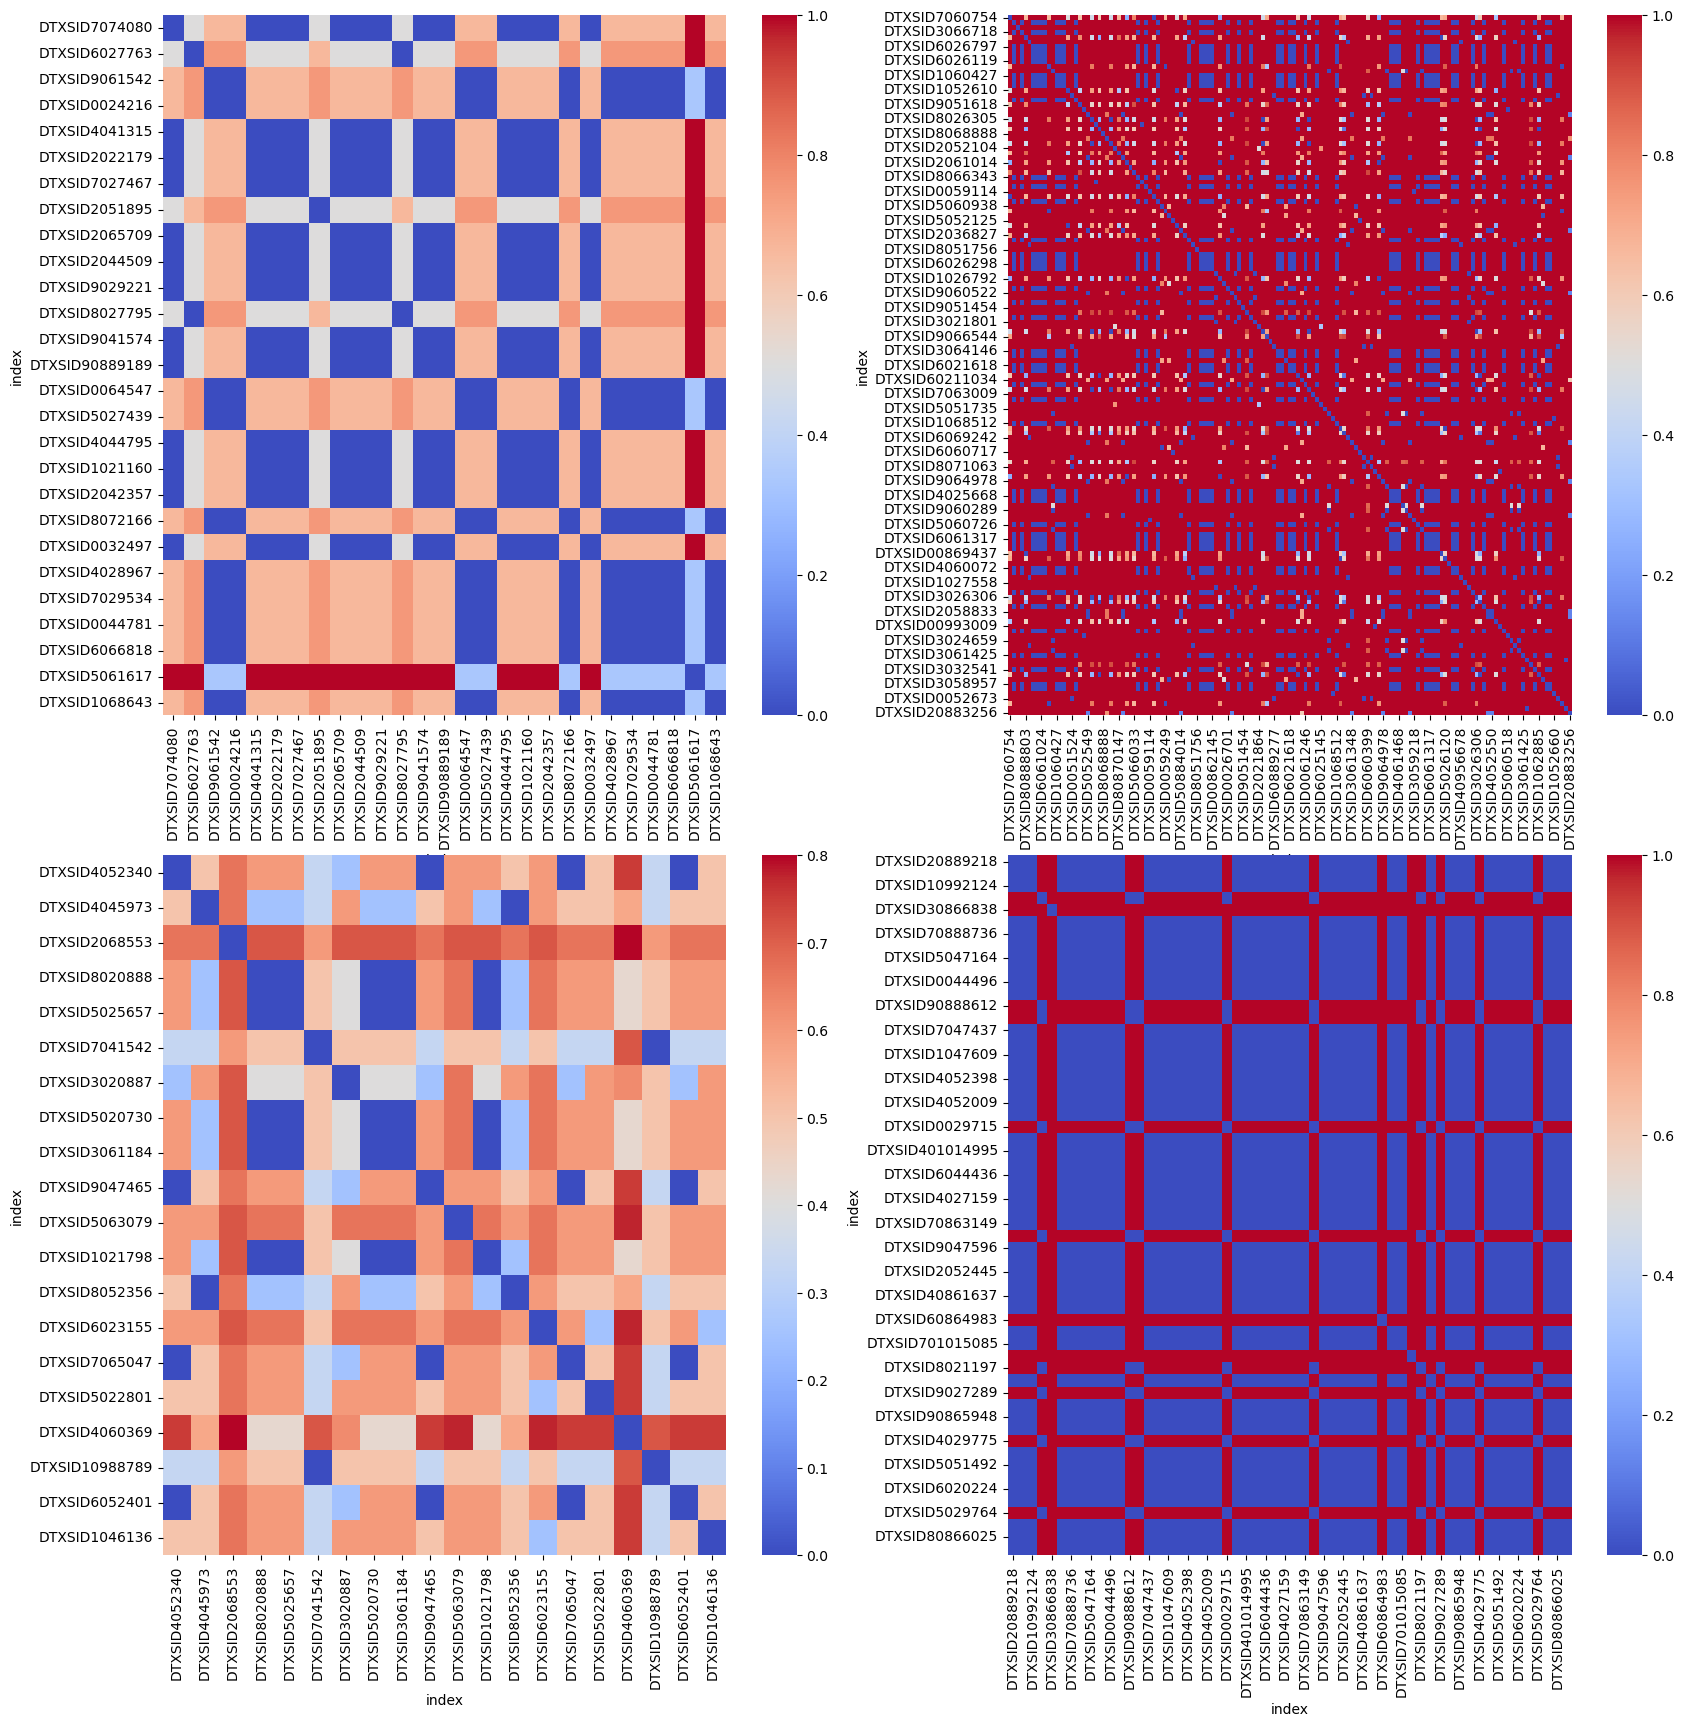

In [250]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])



In [251]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(dists["('Pyridines and derivatives', 1.0)"]), method='ward')

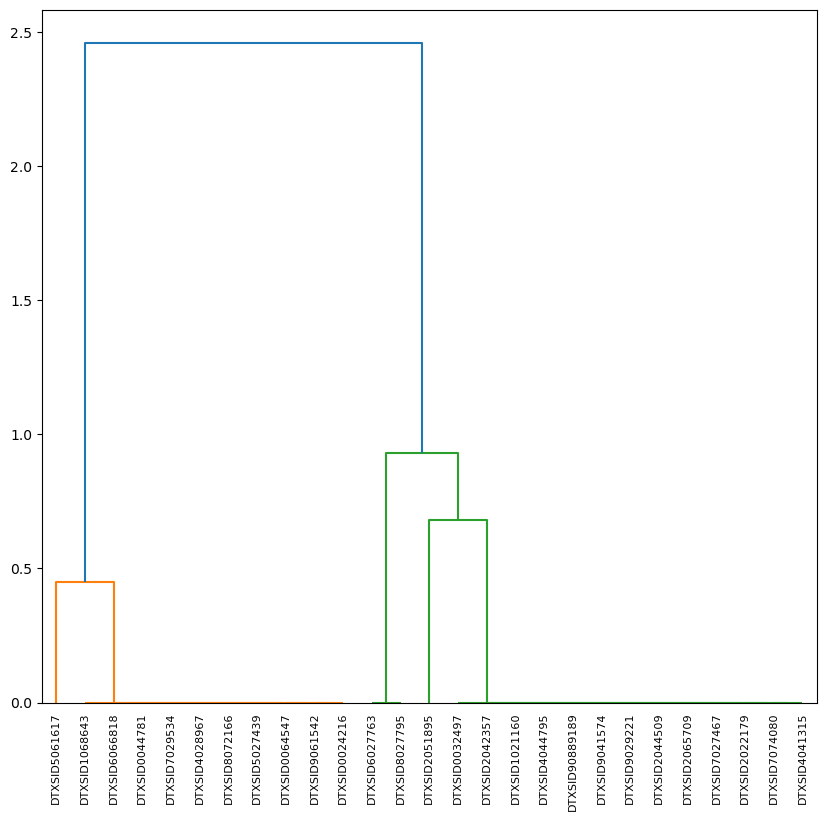

In [252]:
plt.figure(figsize=(10, 9))
dendrogram(
    linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = test.index# font size for the x axis labels
)
plt.show()

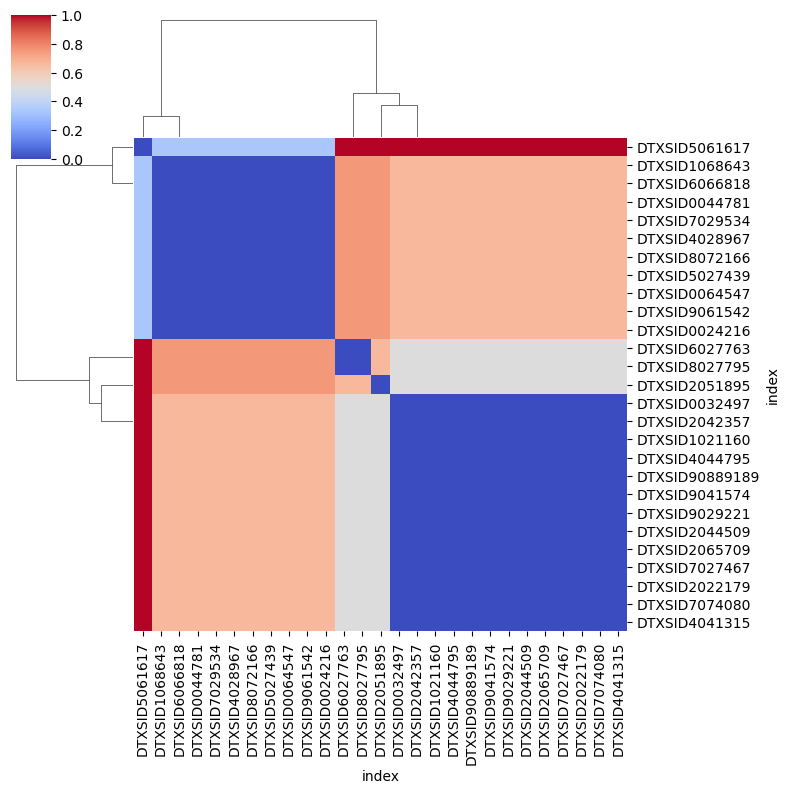

In [253]:
g = sns.clustermap(dists["('Pyridines and derivatives', 1.0)"], row_linkage=linkage, col_linkage=linkage, cmap = 'coolwarm', figsize = (8,8))

In [254]:
#[index_dict[b] for b in g.dendrogram_row.reordered_ind]

In [255]:
test = dists["('Pyridines and derivatives', 1.0)"] 

In [256]:
from scipy.cluster.hierarchy import fcluster

In [257]:
fcluster(linkage, t=0.7, criterion='distance')

array([3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [258]:
#test

In [259]:
clusters = pd.DataFrame(list(zip(test.index, fcluster(linkage, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])


In [260]:
clusters = clusters.sort_values(by= 'cluster_d', ascending = True)

In [261]:
test.loc[['DTXSID90889189','DTXSID4044795'], ['DTXSID90889189','DTXSID4044795']]

index,DTXSID90889189,DTXSID4044795
index,,
DTXSID90889189,0.0,0.0
DTXSID4044795,0.0,0.0


In [262]:
results["('Pyridines and derivatives', 1.0)"].loc[['DTXSID90889189','DTXSID4044795'],]

alert,"('5alpha-Reductase inhibition mammal', ""4-Carboxy-4'-benzoyl-benzophenone or analogue"")","('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')","('Adrenal gland toxicity mammal', 'Adamantane')","('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')","('Adrenal gland toxicity mammal', 'Methylenebisphenol')","('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')","('Androgen receptor modulation mammal', ""[1,1'-Biphenyl]-4-carbonitrile or derivative"")","('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')","('Androgen receptor modulation mammal', 'Chalcone derivative')","('Androgen receptor modulation mammal', 'Quinoline or analogue')",...,"('Urolithiasis mammal', 'Cidofovir-like')","('Urolithiasis mammal', 'Etidronic acid-like')","('Urolithiasis mammal', 'Methyclothiazide-like')","('Urolithiasis mammal', 'Sulfadiazine-like')","('Urolithiasis mammal', 'Ticrynafen-like')","('alpha-2-mu-Globulin nephropathy mammal', 'Isopentyl group')","('alpha-2-mu-Globulin nephropathy mammal', 'Polychlorinated ethane')","('alpha-2-mu-Globulin nephropathy mammal', 'Polyhalogenated benzene')",group_str,final_picks
index,,,,,,,,,,,,,,,,,,,,,
DTXSID90889189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Pyridines and derivatives', 1.0)",NaN
DTXSID4044795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"('Pyridines and derivatives', 1.0)",NaN


In [263]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID1068643'] ==1]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')'],
      dtype='object', name='alert')

In [264]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID6066818'] ==1]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')'],
      dtype='object', name='alert')

In [265]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID6027763'] ==1]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Nephrotoxicity mammal', 'Aromatic nitrile')', 'final_picks'],
      dtype='object', name='alert')

In [266]:
clusters_df = pd.merge(results["('Pyridines and derivatives', 1.0)"], clusters, left_on = results["('Pyridines and derivatives', 1.0)"].index, right_on = 'dtxsid', how = 'left')
clusters_df.to_csv(interim_dir+'pyridines_derivs.csv')

In [267]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==3]).eq(1).any()]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks'],
      dtype='object')

In [268]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==2]).eq(1).any()]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Nephrotoxicity mammal', 'Aromatic nitrile')', 'final_picks'],
      dtype='object')

In [269]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==1]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')',
       'final_picks', 'cluster_d'],
      dtype='object')

In [270]:
linkage_c = hc.linkage(sp.distance.squareform(dists["('Quinolines and derivatives', 3.0)"]), method='ward')

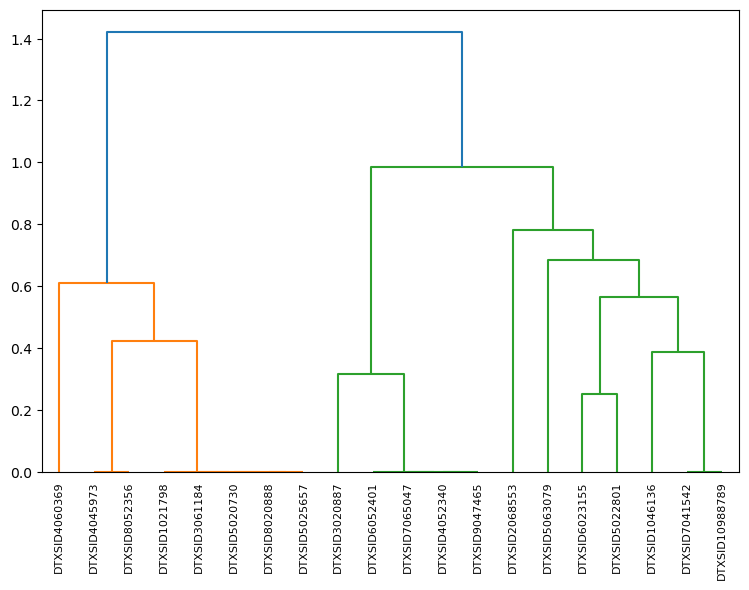

In [271]:
plt.figure(figsize=(9, 6))
dendrogram(
    linkage_c,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = dists["('Quinolines and derivatives', 3.0)"].index# font size for the x axis labels
)
plt.show()

In [272]:
clusters_c = pd.DataFrame(list(zip(dists["('Quinolines and derivatives', 3.0)"].index, fcluster(linkage_c, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])

In [273]:
clusters_c_df = pd.merge(results["('Quinolines and derivatives', 3.0)"], clusters_c, left_on = results["('Quinolines and derivatives', 3.0)"].index, right_on = 'dtxsid', how = 'left')
clusters_c_df.to_csv(interim_dir+'quinolines_derivs.csv')

In [274]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==1]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Aromatic amine or amide')',
       '('Hepatotoxicity mammal', 'Quinoline')',
       '('Mutagenicity in vitro bacterium', 'Aromatic amine or amide')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Aromatic amine or amide')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks', 'cluster_d'],
      dtype='object')

In [275]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==2]).eq(1).any()]

Index(['('Androgen receptor modulation mammal', 'Quinoline or analogue')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks'],
      dtype='object')

In [276]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==3]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Aromatic nitroso compound')',
       '('Carcinogenicity mammal', 'Polyhalogenated aromatic')',
       '('Mutagenicity in vitro bacterium', 'Aromatic nitroso compound')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Thyroid toxicity mammal', 'Aromatic iodo compound')', 'final_picks'],
      dtype='object')

In [277]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==4]).eq(1).any()]

Index(['('Carcinogenicity mammal', '4-Aminobiphenyl, benzidine, naphthylamine or precursors')',
       '('Carcinogenicity mammal', 'Aromatic azo compound')',
       '('Mutagenicity in vitro bacterium', 'Aromatic azo compound')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')'],
      dtype='object')

In [278]:
len(results.keys())

172

In [280]:
#df.group_str.unique()

In [281]:
[e for e in df.group_str.unique().tolist() if e not in results.keys()]

[nan,
 "('Homogeneous metal compounds', nan)",
 "('Homogeneous non-metal compounds', 1.0)",
 "('Inorganic salts', nan)",
 "('Miscellaneous inorganic compounds', nan)",
 "('Mixed metal/non-metal compounds', 1.0)",
 "('Mixed metal/non-metal compounds', 2.0)",
 "('Mixed metal/non-metal compounds', 3.0)",
 "('Mixed metal/non-metal compounds', 4.0)"]

In [283]:
def clust_output(d, r, label = None):
    link = hc.linkage(sp.distance.squareform(d[label]), method='ward')
    clust = pd.DataFrame(list(zip(dists[label].index, fcluster(link, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])
    clust_df = pd.merge(r[label], clust, left_on = r[label].index, right_on = 'dtxsid', how = 'left')
    return clust_df
    

In [290]:
def clust_out(clust_df, label = None):
    n = clust_df.cluster_d.nunique()
    alerts = {}
    for i in range(1, n):
        alerts[i] = clust_df.columns[(clust_df[clust_df['cluster_d'] ==n]).eq(1).any()]
    return   alerts

In [286]:
summaries = {}
for e in results.keys():
    try:
        summaries[e] = clust_output(dists, results, label = e)
    except Exception as error:
        print(e)

('Homogeneous non-metal compounds', 2.0)


In [291]:
alert_dict = {}
for e in summaries.keys():
    alert_dict[e] = clust_out(summaries[e])

In [293]:
alert_dict["('Acetylides', nan)"]

{1: Index(['('Carcinogenicity mammal', 'Alkylating agent')',
        '('Chromosome damage in vitro mammal', 'Alkylating agent')',
        '('Mutagenicity in vitro bacterium', 'Alkylating agent')',
        '('Skin irritation/corrosion mammal', 'Alkyl halide')'],
       dtype='object'),
 2: Index(['('Carcinogenicity mammal', 'Alkylating agent')',
        '('Chromosome damage in vitro mammal', 'Alkylating agent')',
        '('Mutagenicity in vitro bacterium', 'Alkylating agent')',
        '('Skin irritation/corrosion mammal', 'Alkyl halide')'],
       dtype='object')}

In [294]:
{k:len(v) for k, v in alert_dict.items() if len(v) == 0}

{"('Allenes', nan)": 0,
 "('Anthracenes', 5.0)": 0,
 "('Azobenzenes', 1.0)": 0,
 "('Azobenzenes', 5.0)": 0,
 "('Azobenzenes', 6.0)": 0,
 "('Azoles', 3.0)": 0,
 "('Hydrocarbons', 1.0)": 0,
 "('Mixed metal/non-metal compounds', 5.0)": 0,
 "('Organic oxygen compounds', nan)": 0,
 "('Phenylpropanoids and polyketides', 1.0)": 0}

In [336]:
for k, v in alert_dict.items():
    if len(v) ==0:
        print(k, results[k].iloc[:,:-2].shape)

('Allenes', nan) (2, 619)
('Anthracenes', 5.0) (17, 619)
('Azobenzenes', 1.0) (7, 619)
('Azobenzenes', 5.0) (13, 619)
('Azobenzenes', 6.0) (23, 619)
('Azoles', 3.0) (4, 619)
('Hydrocarbons', 1.0) (50, 619)
('Mixed metal/non-metal compounds', 5.0) (5, 619)
('Organic oxygen compounds', nan) (6, 619)
('Phenylpropanoids and polyketides', 1.0) (14, 619)


In [337]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]) == 0:
            print(k, results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()])

('Allenes', nan) Index([], dtype='object', name='alert')
('Hydrocarbons', 1.0) Index([], dtype='object', name='alert')
('Mixed metal/non-metal compounds', 5.0) Index([], dtype='object', name='alert')
('Phenylpropanoids and polyketides', 1.0) Index([], dtype='object', name='alert')


In [346]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]) != 0:
            print(k, len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]), results[k].iloc[:,:-2].shape[0])
            #print(k)

('Anthracenes', 5.0) 18 17
('Azobenzenes', 1.0) 9 7
('Azobenzenes', 5.0) 15 13
('Azobenzenes', 6.0) 21 23
('Azoles', 3.0) 13 4
('Organic oxygen compounds', nan) 9 6


<Axes: xlabel='alert', ylabel='index'>

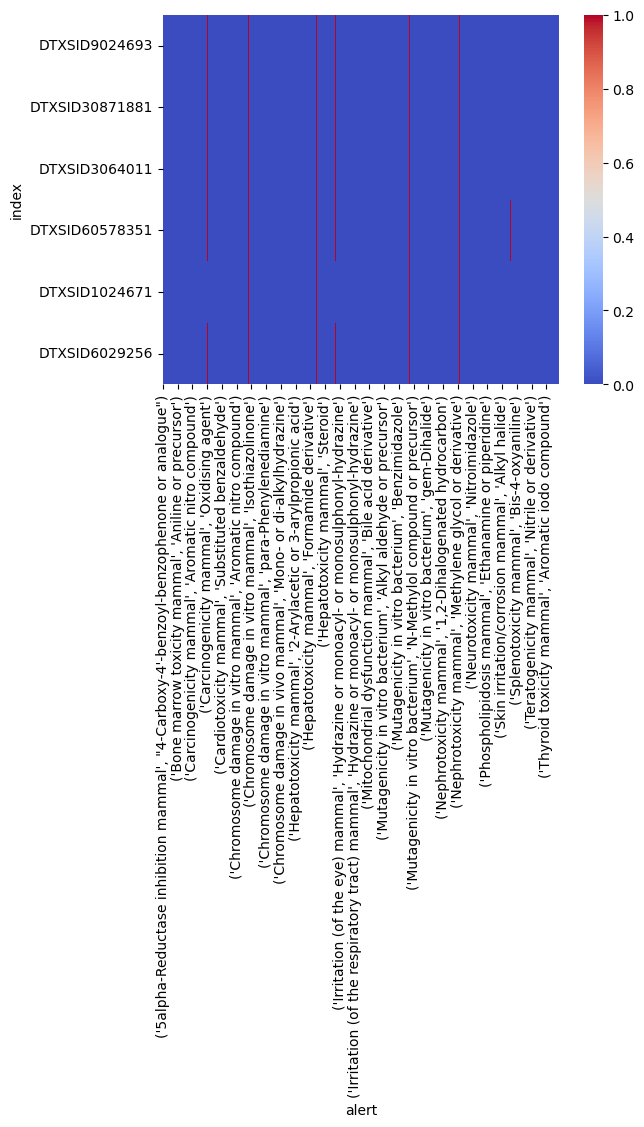

In [342]:
sns.heatmap(results["('Organic oxygen compounds', nan)"].iloc[:,:-2], cmap = 'coolwarm')

In [353]:
myalerts = []
for k,v in list(alert_dict.items()):
    if len(v) !=0:
        myalerts.append([k,len(v)])

In [360]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).sort_values(by = 'number of alerts').describe()

,number of alerts
count,161.000000
mean,13.186335
std,16.435178
min,1.000000
25%,4.000000
50%,6.000000
75%,15.000000
max,101.000000


In [363]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).to_csv(interim_dir+'derekalertcount_termcategories.csv')

<Axes: ylabel='Frequency'>

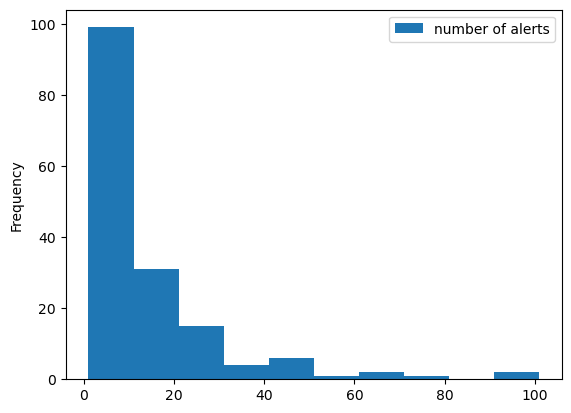

In [362]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).sort_values(by = 'number of alerts').plot(kind = 'hist')